In [1]:
import csv
import pandas as pd
import numpy as np
import copy
import pickle
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set() # setting seaborn default for plots
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
'''
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

print ('설정파일 위치: ', mpl.matplotlib_fname())

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 
'''


"\nprint ('버전: ', mpl.__version__)\nprint ('설치 위치: ', mpl.__file__)\nprint ('설정 위치: ', mpl.get_configdir())\nprint ('캐시 위치: ', mpl.get_cachedir())\n\nprint ('설정파일 위치: ', mpl.matplotlib_fname())\n\nfont_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')\n\n# ttf 폰트 전체갯수\nprint(len(font_list)) \n"

# 한글깨짐방지를 위한 폰트설정

In [3]:
# 기본 설정 읽기

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )


font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list

f = [f.name for f in fm.fontManager.ttflist]
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Malgun' in f.name]

font_path = 'C:\\Windows\\Fonts\\malgun.ttf'

font_name = fm.FontProperties(fname=font_path).get_name()
 
#font 설정
mpl.rc('font',family=font_name)
print(plt.rcParams['font.family'])
#plt.rc('font', family='NanumGothic') # For Windows




# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['sans-serif']
['Malgun Gothic']


# EDA

In [4]:
df=pd.read_csv('accident_info.csv') # 데이터 전처리한 파일
df.columns

Index(['Unnamed: 0', '사고년도', '사고월', '사고일', '사고시각', '사고시간_인덱스', '사고요일',
       '사고요일_i', '사고장소', '위도', '경도', '사고내용', '사고내용_i', '사고유형', '사고유형_i',
       '기상상태', '기상상태_i', '도로형태', '가해운전자 차종', '가해운전자 차종_i', '가해운전자 성별',
       '가해운전자 성별_i', '가해운전자_연령대', '피해운전자 차종', '피해운전자 차종_i', '피해운전자 성별',
       '피해운전자 성별_i', '피해운전자_연령대'],
      dtype='object')

In [5]:
df=df[['사고년도', '사고월', '사고일', '사고시각', '사고시간_인덱스', '사고요일',
       '사고요일_i', '사고장소', '위도', '경도', '사고내용', '사고내용_i', '사고유형', '사고유형_i',
       '기상상태', '기상상태_i', '도로형태', '가해운전자 차종', '가해운전자 차종_i', '가해운전자 성별',
       '가해운전자 성별_i', '가해운전자_연령대', '피해운전자 차종', '피해운전자 차종_i', '피해운전자 성별',
       '피해운전자 성별_i', '피해운전자_연령대']]
print(df.columns)

Index(['사고년도', '사고월', '사고일', '사고시각', '사고시간_인덱스', '사고요일', '사고요일_i', '사고장소',
       '위도', '경도', '사고내용', '사고내용_i', '사고유형', '사고유형_i', '기상상태', '기상상태_i',
       '도로형태', '가해운전자 차종', '가해운전자 차종_i', '가해운전자 성별', '가해운전자 성별_i', '가해운전자_연령대',
       '피해운전자 차종', '피해운전자 차종_i', '피해운전자 성별', '피해운전자 성별_i', '피해운전자_연령대'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5213 entries, 0 to 5212
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사고년도        5213 non-null   int64  
 1   사고월         5213 non-null   int64  
 2   사고일         5213 non-null   int64  
 3   사고시각        5213 non-null   int64  
 4   사고시간_인덱스    5213 non-null   int64  
 5   사고요일        5213 non-null   object 
 6   사고요일_i      5213 non-null   int64  
 7   사고장소        5213 non-null   object 
 8   위도          5213 non-null   float64
 9   경도          5213 non-null   float64
 10  사고내용        5213 non-null   object 
 11  사고내용_i      5213 non-null   int64  
 12  사고유형        5213 non-null   object 
 13  사고유형_i      5213 non-null   int64  
 14  기상상태        5213 non-null   object 
 15  기상상태_i      5213 non-null   int64  
 16  도로형태        5213 non-null   int64  
 17  가해운전자 차종    5213 non-null   object 
 18  가해운전자 차종_i  5213 non-null   int64  
 19  가해운전자 성별    5213 non-null  

In [7]:
df.shape

(5213, 27)

In [8]:
df.isnull().sum()

사고년도          0
사고월           0
사고일           0
사고시각          0
사고시간_인덱스      0
사고요일          0
사고요일_i        0
사고장소          0
위도            0
경도            0
사고내용          0
사고내용_i        0
사고유형          0
사고유형_i        0
기상상태          0
기상상태_i        0
도로형태          0
가해운전자 차종      0
가해운전자 차종_i    0
가해운전자 성별      0
가해운전자 성별_i    0
가해운전자_연령대     0
피해운전자 차종      0
피해운전자 차종_i    0
피해운전자 성별      0
피해운전자 성별_i    0
피해운전자_연령대     0
dtype: int64

In [9]:
df_count=pd.read_csv('사고주소및발생수.csv') # [도로명주소, 사고발생 횟수]
df_count

,주소,사고발생 횟수
0,서울특별시 강남구 개포동 개포로,58
1,서울특별시 강남구 개포동 개포로109길,6
2,서울특별시 강남구 개포동 개포로110길,2
3,서울특별시 강남구 개포동 개포로22길,4
4,서울특별시 강남구 개포동 개포로25길,1
...,...,...
467,서울특별시 강남구 청담동 올림픽대로,44
468,서울특별시 강남구 청담동 학동로,32
469,서울특별시 강남구 청담동 학동로59길,3
470,서울특별시 강남구 청담동 학동로68길,1


In [10]:
addr=df_count['주소']
cnt=df_count['사고발생 횟수']

d={a:c for a,c in zip(addr,cnt)}  # 각 사고장소에 따른 사고발생회수의 사전을 만들기

# 사고발생수 분포

In [11]:
cnt2=[]
for i in range(0,df.shape[0]):
    cnt2.append(d[df['사고장소'][i]])
    

df['사고발생수']=cnt2
df.columns

Index(['사고년도', '사고월', '사고일', '사고시각', '사고시간_인덱스', '사고요일', '사고요일_i', '사고장소',
       '위도', '경도', '사고내용', '사고내용_i', '사고유형', '사고유형_i', '기상상태', '기상상태_i',
       '도로형태', '가해운전자 차종', '가해운전자 차종_i', '가해운전자 성별', '가해운전자 성별_i', '가해운전자_연령대',
       '피해운전자 차종', '피해운전자 차종_i', '피해운전자 성별', '피해운전자 성별_i', '피해운전자_연령대',
       '사고발생수'],
      dtype='object')

[128  63  46 ...  75  75  46]
185
<class 'numpy.ndarray'>


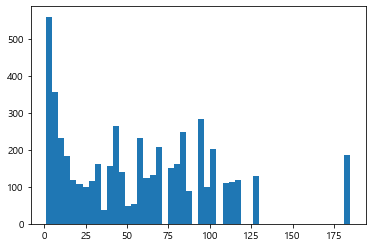

In [12]:
# 사고발생수 분포확인 
x=np.array(df['사고발생수'])
print(x)
s = pd.Series(x)
s.describe()

n, bins, patches=plt.hist(x, bins=50)
    

print(max(x))
print(type(x))

In [13]:
import pandas as pd

# Quantile -> 주어진 데이터를 동등한 크기로 분할 
x=list(x)
num = pd.Series(x)

Q1 = num.quantile(.2)
Q2 = num.quantile(.4)
Q3 = num.quantile(.6)
Q4 = num.quantile(.8)
Q5 = num.quantile(1)

IQR = Q3 - Q1

print("Q1 =",Q1)
print("Q2 =",Q2)
print("Q3 =",Q3)
print("Q4 =",Q4)
print("Q5 =",Q5)
print('IQR =',IQR)

Q1 = 10.0
Q2 = 40.0
Q3 = 68.0
Q4 = 96.0
Q5 = 185.0
IQR = 58.0


In [14]:
danger=[]

for i in df['사고발생수']:
    if i>=96:
        danger.append(5)
    elif i>=68:
        danger.append(4)
    elif i>=40:
        danger.append(3)
    elif i>=10:
        danger.append(2)
    else:
        danger.append(1)


[5 3 3 ... 4 4 3]


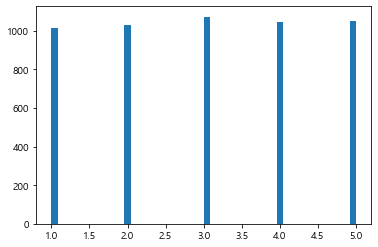

In [15]:
# 사고발생수 분포 
x=np.array(danger)
print(x)
s = pd.Series(x)
s.describe()

n, bins, patches=plt.hist(x, bins=50)
    

In [16]:
df['위험도']=danger
df.head(5)

,사고년도,사고월,사고일,사고시각,사고시간_인덱스,사고요일,사고요일_i,사고장소,위도,경도,...,가해운전자 성별,가해운전자 성별_i,가해운전자_연령대,피해운전자 차종,피해운전자 차종_i,피해운전자 성별,피해운전자 성별_i,피해운전자_연령대,사고발생수,위험도
0,2018,4,6,17,5,금,4,서울특별시 강남구 역삼동 논현로,37.499907,127.037393,...,남,0,30,이륜,5,남,0,40,128,5
1,2018,4,21,2,0,토,5,서울특별시 강남구 역삼동 역삼로,37.499075,127.047030,...,남,0,30,승용,0,남,0,40,63,3
2,2018,1,30,21,7,화,1,서울특별시 강남구 역삼동 도곡로,37.494213,127.046250,...,남,0,30,승용,0,남,0,50,46,3
3,2018,5,22,20,6,화,1,서울특별시 강남구 역삼동 언주로,37.499907,127.037393,...,남,0,60,이륜,5,남,0,60,117,5
4,2018,8,24,19,6,금,4,서울특별시 강남구 역삼동 언주로,37.499907,127.037393,...,남,0,20,승용,0,남,0,70,117,5


# EDA (위험도 기준)

In [17]:
df.info()
df_relation=df[['위도','경도','사고월','사고시간_인덱스','사고요일_i','사고내용_i','사고유형_i','기상상태_i','도로형태','위험도']]
df_relation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5213 entries, 0 to 5212
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사고년도        5213 non-null   int64  
 1   사고월         5213 non-null   int64  
 2   사고일         5213 non-null   int64  
 3   사고시각        5213 non-null   int64  
 4   사고시간_인덱스    5213 non-null   int64  
 5   사고요일        5213 non-null   object 
 6   사고요일_i      5213 non-null   int64  
 7   사고장소        5213 non-null   object 
 8   위도          5213 non-null   float64
 9   경도          5213 non-null   float64
 10  사고내용        5213 non-null   object 
 11  사고내용_i      5213 non-null   int64  
 12  사고유형        5213 non-null   object 
 13  사고유형_i      5213 non-null   int64  
 14  기상상태        5213 non-null   object 
 15  기상상태_i      5213 non-null   int64  
 16  도로형태        5213 non-null   int64  
 17  가해운전자 차종    5213 non-null   object 
 18  가해운전자 차종_i  5213 non-null   int64  
 19  가해운전자 성별    5213 non-null  

,위도,경도,사고월,사고시간_인덱스,사고요일_i,사고내용_i,사고유형_i,기상상태_i,도로형태,위험도
0,37.499907,127.037393,4,5,4,1,0,0,0,5
1,37.499075,127.047030,4,0,5,1,0,0,0,3
2,37.494213,127.046250,1,7,1,1,0,0,0,3
3,37.499907,127.037393,5,6,1,2,0,1,1,5
4,37.499907,127.037393,8,6,4,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...
5208,37.489843,127.043814,5,2,2,1,0,0,0,2
5209,37.489843,127.043814,11,4,0,2,0,0,0,4
5210,37.489843,127.043814,8,1,1,2,0,0,0,4
5211,37.489843,127.043814,11,4,5,1,0,0,0,4


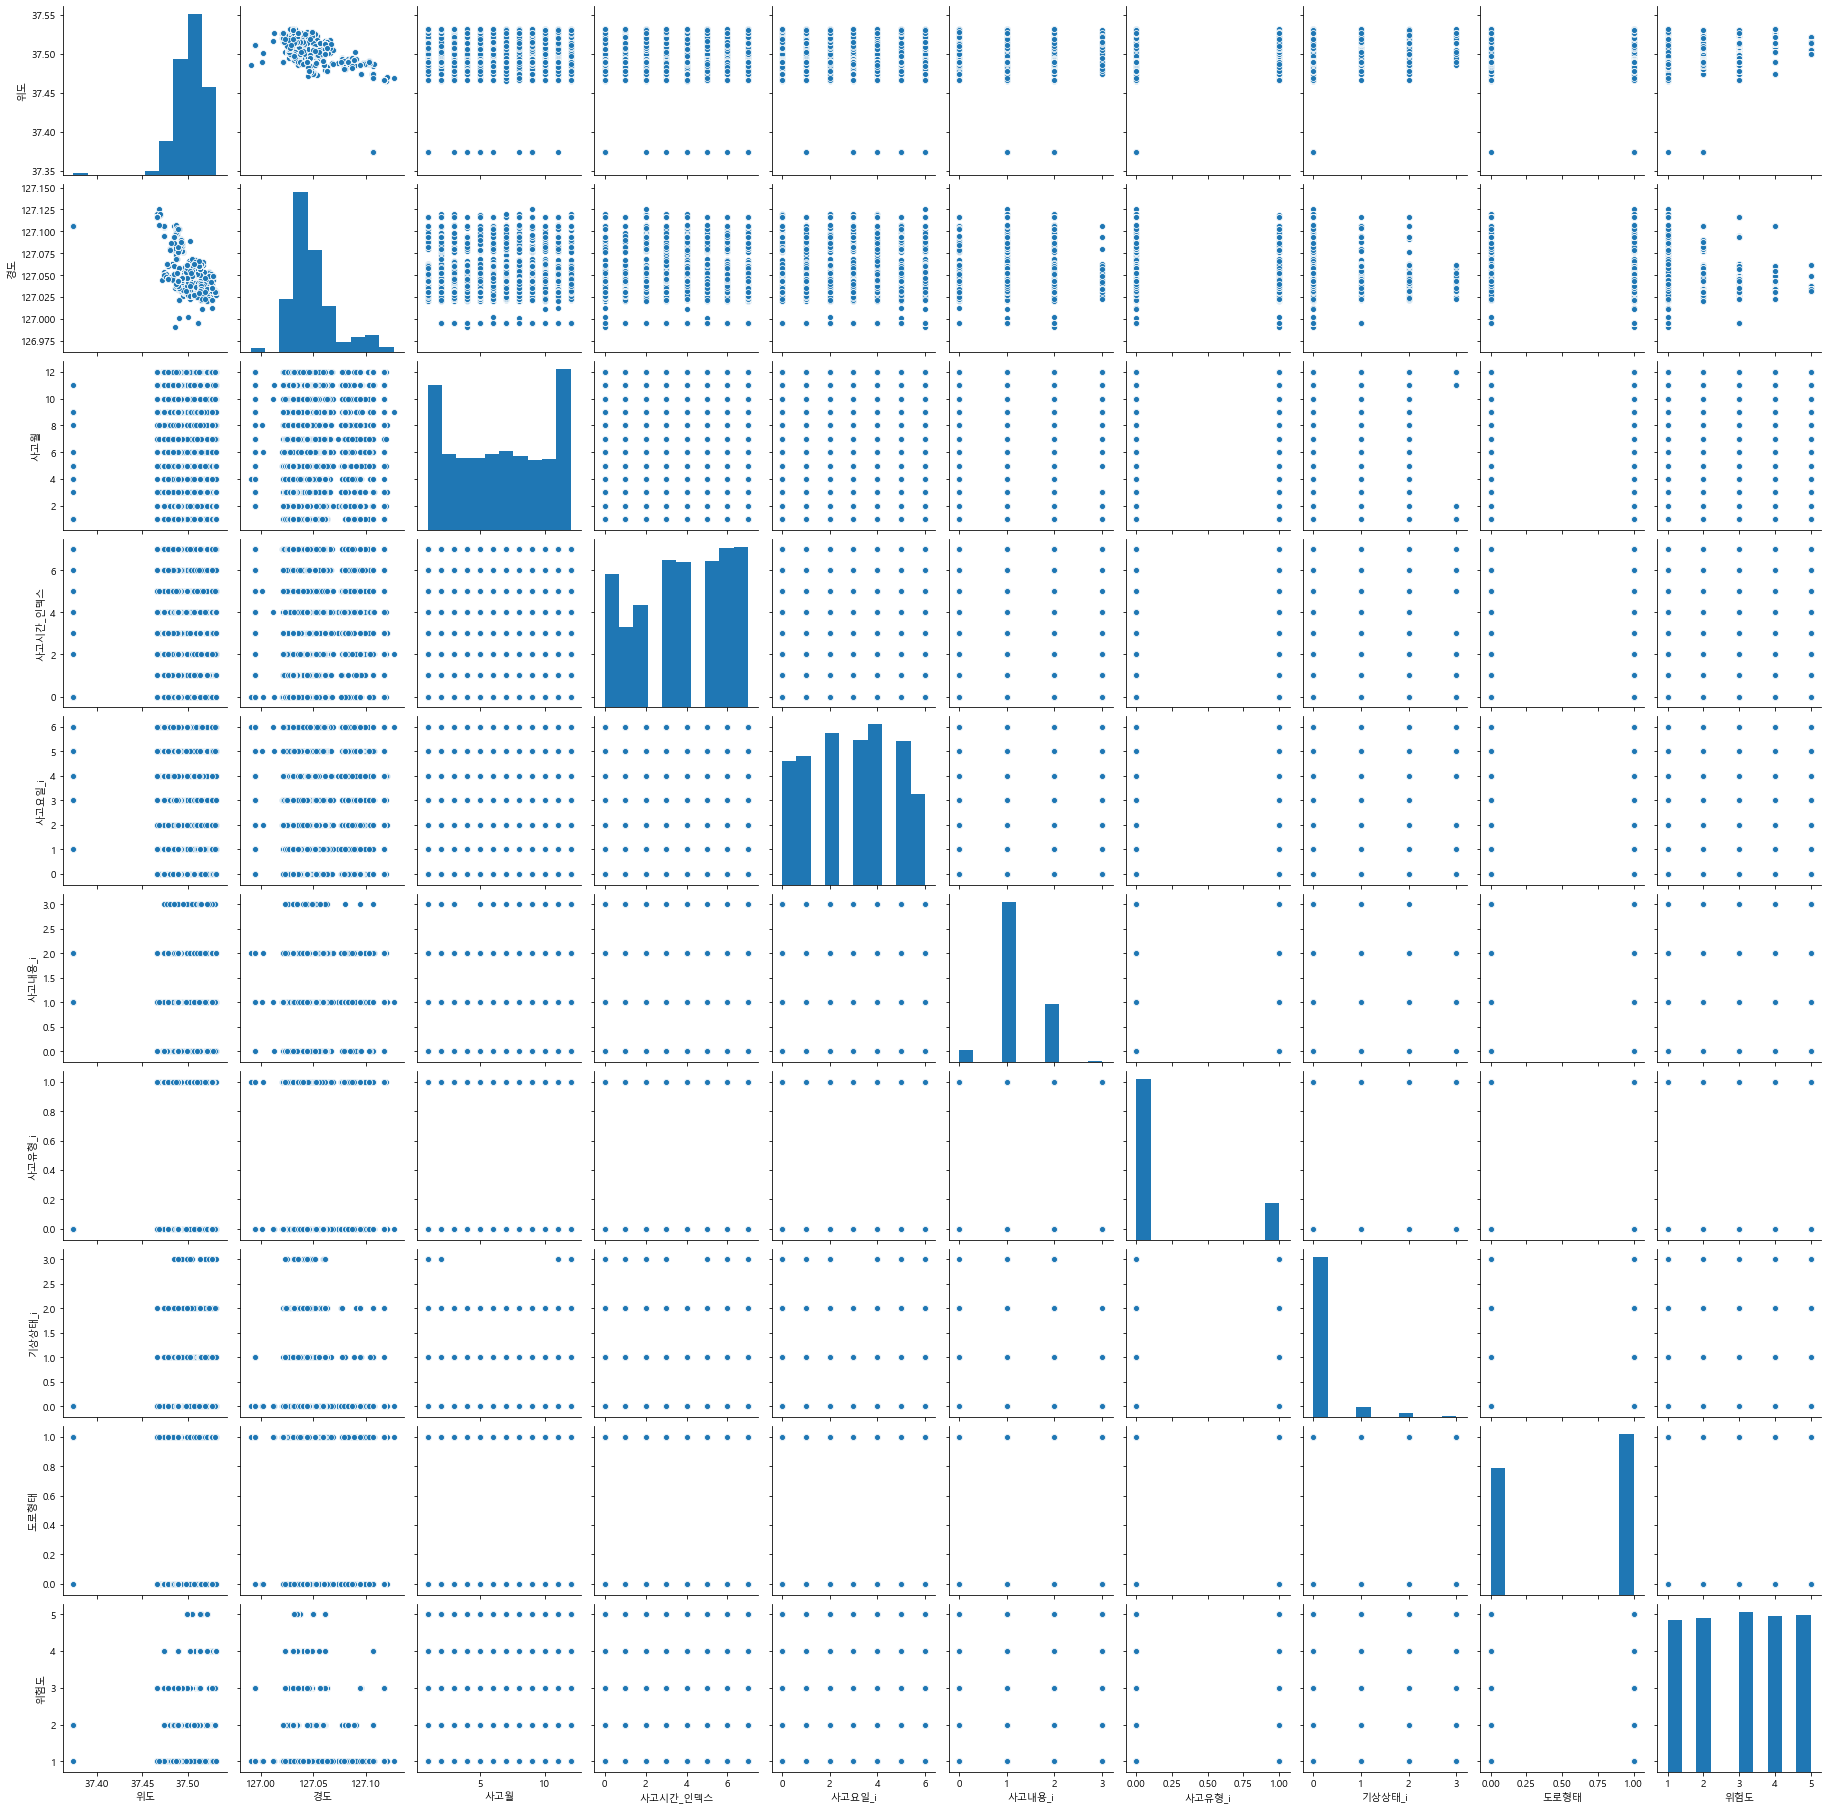

In [18]:
import seaborn as sns
sns.pairplot(data=df_relation) # , diag_kind='hist'
plt.show()

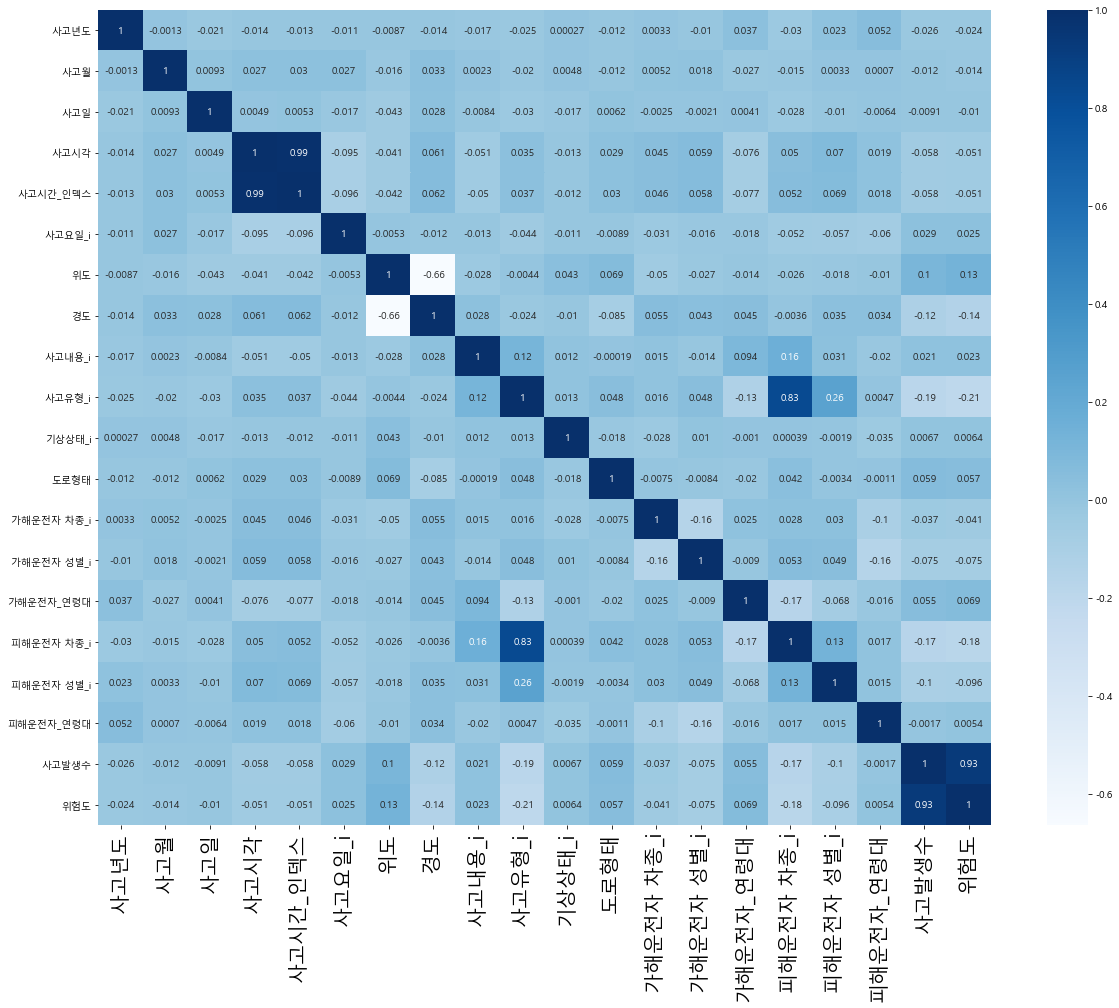

In [71]:
import seaborn as sns
plt.figure(figsize = (20,15))
sns.heatmap(data=df.corr(),annot=True,cmap = 'Blues')
plt.show()

In [20]:
# Not Stacked
def bar_chart(feature):
    grade_1 = df[df['위험도']==1][feature].value_counts()
    grade_2 = df[df['위험도']==2][feature].value_counts()
    grade_3 = df[df['위험도']==3][feature].value_counts()
    grade_4 = df[df['위험도']==4][feature].value_counts()
    grade_5 = df[df['위험도']==5][feature].value_counts()
    
    df2 = pd.DataFrame([grade_1,grade_2,grade_3,grade_4,grade_5])
    df2.index = ['grade_1','grade_2','grade_3','grade_4','grade_5']
    print(df2)
    ax=df2.plot(kind='bar',stacked=False, rot=0,figsize=(10,15))
    
    # 범례 나타내기
    ax.legend(loc='upper right', shadow=True, ncol=1)
    #plt.rc('legend', fontsize=30)
    
    # 보조선(눈금선) 나타내기
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
    for p in ax.patches: 
        #print(p.get_bbox().bounds)
        left, bottom, width, height = p.get_bbox().bounds 
        ax.annotate("%d"%(height*100), (left+width/2, bottom+height/2), ha='center',va='center',fontsize=10)
        
    # 그래프 저장하고 출력하기
    '''
    plt.tight_layout()
    plt.savefig('ex_barplot.png', format='png', dpi=300)
    plt.show()
    '''
    
    plt.show()

In [21]:
# Stacked 
def bar_chart2(feature):
    grade_1 = df[df['위험도']==1][feature].value_counts()
    grade_2 = df[df['위험도']==2][feature].value_counts()
    grade_3 = df[df['위험도']==3][feature].value_counts()
    grade_4 = df[df['위험도']==4][feature].value_counts()
    grade_5 = df[df['위험도']==5][feature].value_counts()
    
    df2 = pd.DataFrame([grade_1,grade_2,grade_3,grade_4,grade_5])
    df2.index = ['grade_1','grade_2','grade_3','grade_4','grade_5']
    print(df2)
    ax=df2.plot(kind='bar',stacked=True, rot=0,figsize=(8,8))
    
    # 범례 나타내기
    ax.legend(loc='upper right', shadow=True, ncol=1, bbox_to_anchor=(1.15, 1))
    #plt.rc('legend', fontsize=30)
    
    # 보조선(눈금선) 나타내기
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
    for p in ax.patches: 
        #print(p.get_bbox().bounds)
        left, bottom, width, height = p.get_bbox().bounds 
        ax.annotate("%d"%(height*100), (left+width/2, bottom+height/2), ha='center',va='center',fontsize=6)
        
    # 그래프 저장하고 출력하기
    '''
    plt.tight_layout()
    plt.savefig('ex_barplot.png', format='png', dpi=300)
    plt.show()
    '''
    
    plt.show()

In [22]:
df.columns

Index(['사고년도', '사고월', '사고일', '사고시각', '사고시간_인덱스', '사고요일', '사고요일_i', '사고장소',
       '위도', '경도', '사고내용', '사고내용_i', '사고유형', '사고유형_i', '기상상태', '기상상태_i',
       '도로형태', '가해운전자 차종', '가해운전자 차종_i', '가해운전자 성별', '가해운전자 성별_i', '가해운전자_연령대',
       '피해운전자 차종', '피해운전자 차종_i', '피해운전자 성별', '피해운전자 성별_i', '피해운전자_연령대',
       '사고발생수', '위험도'],
      dtype='object')

          1   2    3   4   5   6    7   8   9   10   11   12
grade_1   92  63   79  67  77  76   86  99  94  78  109   95
grade_2   81  84  101  85  82  87   87  97  85  89   79   73
grade_3   93  86   95  89  85  99   93  78  74  90   96   94
grade_4  117  76   70  94  77  83   88  79  73  83   86  118
grade_5   80  74   96  83  96  95  105  77  84  74   87  101


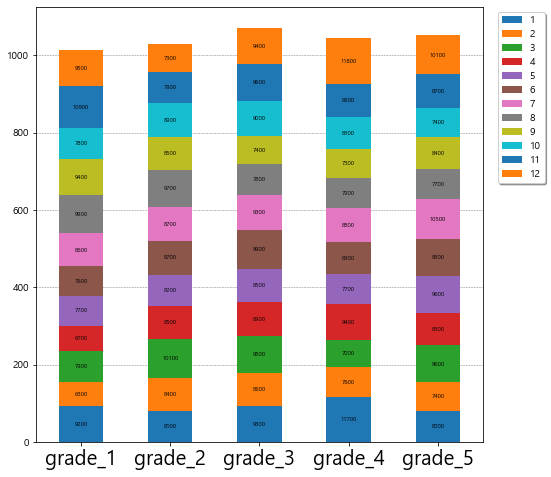

In [67]:

plt.rcParams["font.size"] = 10
plt.rcParams['xtick.labelsize'] = 20.
plt.rcParams['ytick.labelsize'] = 10.

bar_chart2('사고월')

          경상   중상  부상신고  사망
grade_1  696  247    69   3
grade_2  700  265    61   4
grade_3  736  275    50  11
grade_4  741  242    56   5
grade_5  723  279    44   6


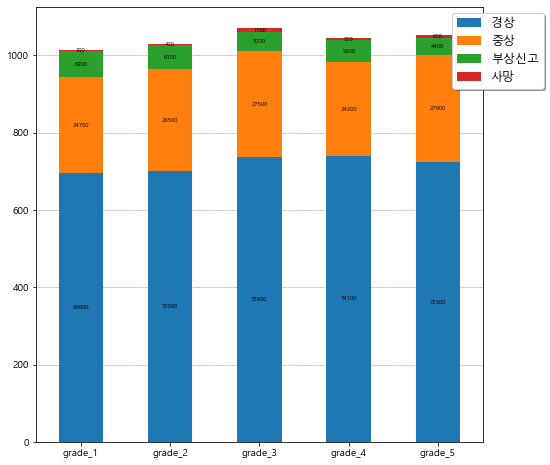

In [24]:
plt.rcParams["figure.figsize"] = (1,1)
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

bar_chart2('사고내용')


          맑음   비  흐림  눈
grade_1  941  46  19  9
grade_2  950  48  30  2
grade_3  985  61  22  4
grade_4  932  80  24  8
grade_5  974  56  15  7


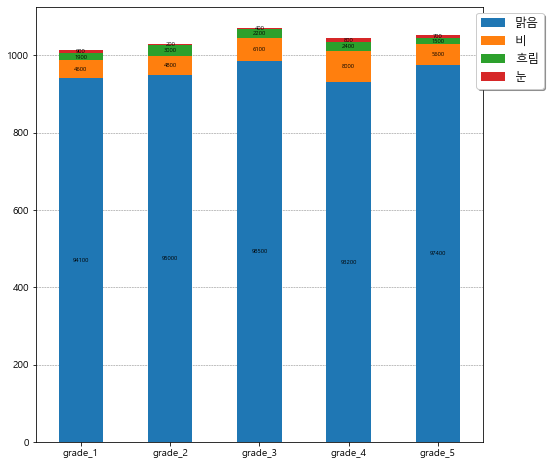

In [25]:

plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

bar_chart2('기상상태')


         차대차  차대사람
grade_1  680   335
grade_2  775   255
grade_3  922   150
grade_4  931   113
grade_5  932   120


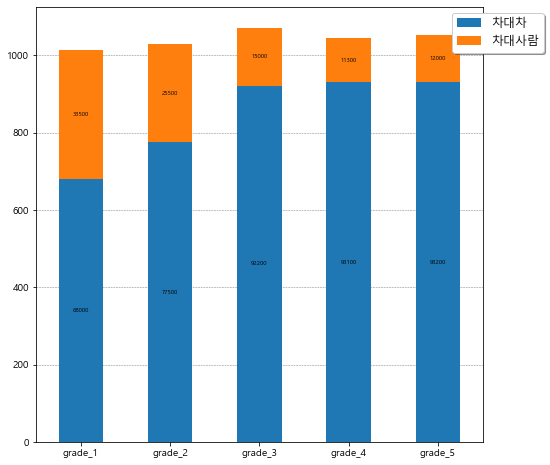

In [26]:

plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

bar_chart2('사고유형')


         0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  19  \
grade_1  42  33  22  25  19  22  15  27  49  51  ...  46  50  58  51  58  57   
grade_2  47  52  27  25  14  27  26  33  37  42  ...  45  47  46  44  61  61   
grade_3  41  35  26  26  17  25  29  32  46  60  ...  49  60  52  45  67  49   
grade_4  51  56  47  24  22  35  27  29  40  49  ...  42  52  42  46  58  41   
grade_5  66  66  36  43  34  32  34  31  40  53  ...  41  43  39  36  52  35   

         20  21  22  23  
grade_1  43  45  35  43  
grade_2  45  49  38  57  
grade_3  55  54  65  54  
grade_4  49  45  72  56  
grade_5  42  46  61  59  

[5 rows x 24 columns]


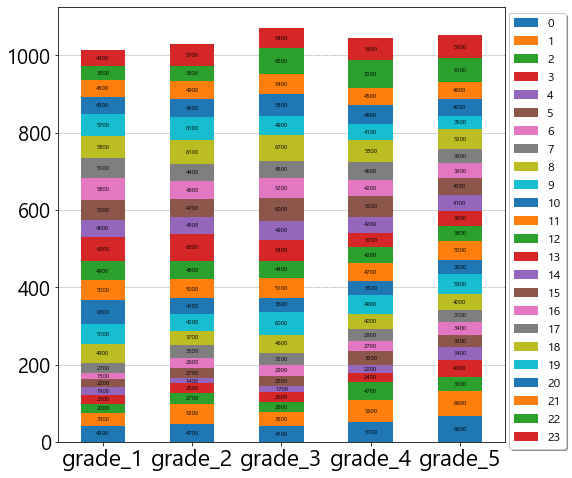

In [27]:
# 가로크기 늘리기
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 20

bar_chart2('사고시각')


           금    수    목    화    토    월    일
grade_1  177  168  156  151  143  130   90
grade_2  182  151  167  135  160  148   87
grade_3  171  189  158  152  156  139  107
grade_4  157  169  168  138  168  126  118
grade_5  201  162  149  135  169  139   97


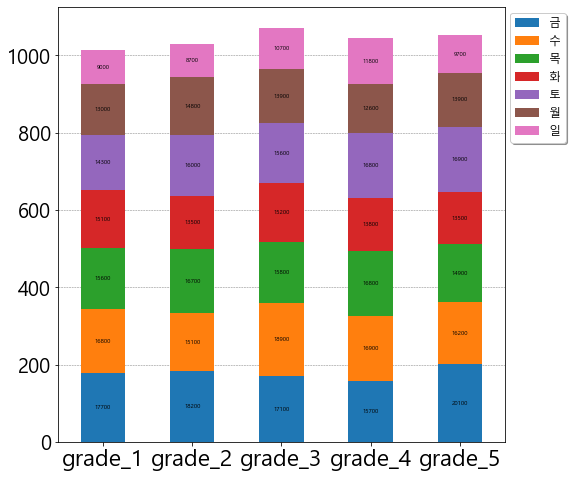

In [28]:
bar_chart2('사고요일')

         0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  19  \
grade_1  42  33  22  25  19  22  15  27  49  51  ...  46  50  58  51  58  57   
grade_2  47  52  27  25  14  27  26  33  37  42  ...  45  47  46  44  61  61   
grade_3  41  35  26  26  17  25  29  32  46  60  ...  49  60  52  45  67  49   
grade_4  51  56  47  24  22  35  27  29  40  49  ...  42  52  42  46  58  41   
grade_5  66  66  36  43  34  32  34  31  40  53  ...  41  43  39  36  52  35   

         20  21  22  23  
grade_1  43  45  35  43  
grade_2  45  49  38  57  
grade_3  55  54  65  54  
grade_4  49  45  72  56  
grade_5  42  46  61  59  

[5 rows x 24 columns]


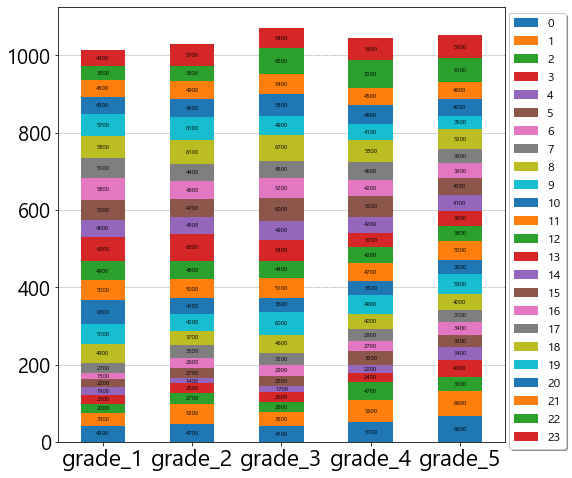

In [29]:
bar_chart2('사고시각')

           0    1    2    3    4    5    6    7
grade_1   97   66   91  164  157  159  158  123
grade_2  126   66   96  133  161  137  167  144
grade_3  102   68  107  147  147  157  171  173
grade_4  154   81   96  131  121  140  148  173
grade_5  168  109  105  139  118  118  129  166


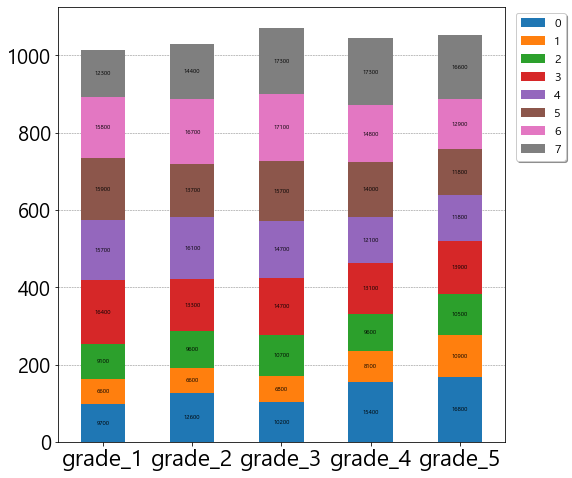

In [30]:
bar_chart2('사고시간_인덱스')

           1    0
grade_1  530  485
grade_2  576  454
grade_3  555  517
grade_4  615  429
grade_5  639  413


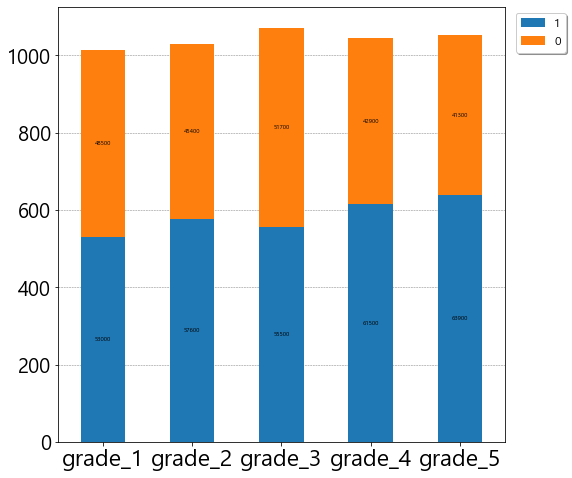

In [31]:
bar_chart2('도로형태')

         10   20   30   40   50   60  70  80
grade_1   8  122  238  216  191  185  53   2
grade_2   9  125  221  188  225  193  66   3
grade_3  21  126  221  187  257  200  58   2
grade_4  11  127  209  189  241  198  66   3
grade_5   6  159  235  166  219  205  56   6


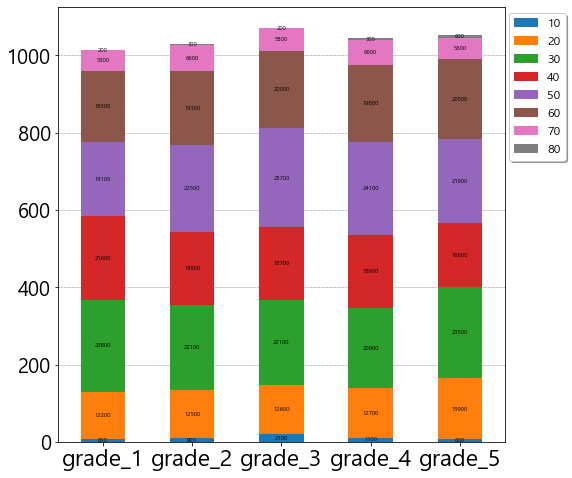

In [32]:
bar_chart2('피해운전자_연령대')

Text(0.5, 1.0, '피해운전자 연령대별 분포')

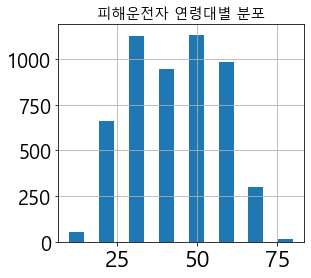

In [33]:
plt.figure(figsize=(15,4))
plt.subplot(133)
df['피해운전자_연령대'].hist(bins=15)
plt.title('피해운전자 연령대별 분포')

Text(0.5, 1.0, '가해운전자 연령대별 분포')

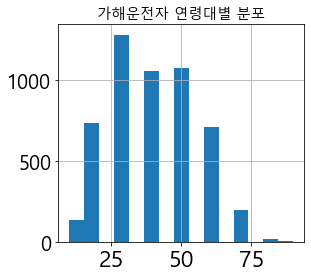

In [34]:
plt.figure(figsize=(15,4))
plt.subplot(133)
df['가해운전자_연령대'].hist(bins=15)
plt.title('가해운전자 연령대별 분포')

In [35]:
df.columns

Index(['사고년도', '사고월', '사고일', '사고시각', '사고시간_인덱스', '사고요일', '사고요일_i', '사고장소',
       '위도', '경도', '사고내용', '사고내용_i', '사고유형', '사고유형_i', '기상상태', '기상상태_i',
       '도로형태', '가해운전자 차종', '가해운전자 차종_i', '가해운전자 성별', '가해운전자 성별_i', '가해운전자_연령대',
       '피해운전자 차종', '피해운전자 차종_i', '피해운전자 성별', '피해운전자 성별_i', '피해운전자_연령대',
       '사고발생수', '위험도'],
      dtype='object')

In [36]:
#df_copy=df[['사고시간_인덱스','사고요일_i','위도','경도','사고내용_i','도로형태','피해운전자 성별_i','위험도']]
#df_copy=df[['사고시각','사고요일_i','위도','경도','사고내용_i','도로형태','피해운전자 성별_i','위험도']]
#df_copy=df[['사고시각','사고요일_i','위도','경도','사고내용_i','도로형태','위험도']]
df_copy=copy.deepcopy(df)
print(df_copy.columns)

df_copy=df_copy[['위도','경도','사고시간_인덱스','사고요일_i','기상상태_i','도로형태','위험도']]
df_copy.head(5)

Index(['사고년도', '사고월', '사고일', '사고시각', '사고시간_인덱스', '사고요일', '사고요일_i', '사고장소',
       '위도', '경도', '사고내용', '사고내용_i', '사고유형', '사고유형_i', '기상상태', '기상상태_i',
       '도로형태', '가해운전자 차종', '가해운전자 차종_i', '가해운전자 성별', '가해운전자 성별_i', '가해운전자_연령대',
       '피해운전자 차종', '피해운전자 차종_i', '피해운전자 성별', '피해운전자 성별_i', '피해운전자_연령대',
       '사고발생수', '위험도'],
      dtype='object')


,위도,경도,사고시간_인덱스,사고요일_i,기상상태_i,도로형태,위험도
0,37.499907,127.037393,5,4,0,0,5
1,37.499075,127.047030,0,5,0,0,3
2,37.494213,127.046250,7,1,0,0,3
3,37.499907,127.037393,6,1,1,1,5
4,37.499907,127.037393,6,4,0,0,5


# 모델링

In [37]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np


# Decision Tree

In [38]:
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import mglearn

data=df_copy
X,y=data.iloc[:,:-1], data['위험도']

# 5 : 5, max_depth=1~5

for i in range(1,6):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['위험도'], test_size=0.5, shuffle=True, random_state=0)
    tree = DecisionTreeClassifier(max_depth=i, random_state=111)
    tree.fit(X_train, y_train)
    print('Max_depth : {}'.format(i))
    print('훈련 세트 정확도 : {:,.3f}'.format(tree.score(X_train, y_train)))
    print('테스트 세트 정확도 : {:,.3f}'.format(tree.score(X_test, y_test)))
    print('특성 중요도 : \n', tree.feature_importances_)
    print()





Max_depth : 1
훈련 세트 정확도 : 0.307
테스트 세트 정확도 : 0.336
특성 중요도 : 
 [1. 0. 0. 0. 0. 0.]

Max_depth : 2
훈련 세트 정확도 : 0.415
테스트 세트 정확도 : 0.430
특성 중요도 : 
 [0.80901191 0.19098809 0.         0.         0.         0.        ]

Max_depth : 3
훈련 세트 정확도 : 0.418
테스트 세트 정확도 : 0.435
특성 중요도 : 
 [0.65538486 0.34461514 0.         0.         0.         0.        ]

Max_depth : 4
훈련 세트 정확도 : 0.534
테스트 세트 정확도 : 0.544
특성 중요도 : 
 [0.67685104 0.32194606 0.0012029  0.         0.         0.        ]

Max_depth : 5
훈련 세트 정확도 : 0.590
테스트 세트 정확도 : 0.602
특성 중요도 : 
 [6.47469387e-01 3.50444076e-01 8.91307898e-04 5.79349767e-04
 6.15879110e-04 0.00000000e+00]



In [39]:
# DecisionTree - 7 : 3

X,y=data.iloc[:,:-1], data['위험도']

for i in range(1,6):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['위험도'], test_size=0.3, shuffle=True, random_state=0)
    tree = DecisionTreeClassifier(max_depth=i, random_state=111)

    tree.fit(X_train, y_train)
    
    print('Max_depth : {}'.format(i))
    print('훈련 세트 정확도 : {:,.3f}'.format(tree.score(X_train, y_train)))
    print('테스트 세트 정확도 : {:,.3f}'.format(tree.score(X_test, y_test)))
    print('특성 중요도 : \n', tree.feature_importances_)
    print()


Max_depth : 1
훈련 세트 정확도 : 0.314
테스트 세트 정확도 : 0.339
특성 중요도 : 
 [1. 0. 0. 0. 0. 0.]

Max_depth : 2
훈련 세트 정확도 : 0.382
테스트 세트 정확도 : 0.386
특성 중요도 : 
 [0.81071071 0.18928929 0.         0.         0.         0.        ]

Max_depth : 3
훈련 세트 정확도 : 0.406
테스트 세트 정확도 : 0.404
특성 중요도 : 
 [0.62942797 0.37057203 0.         0.         0.         0.        ]

Max_depth : 4
훈련 세트 정확도 : 0.489
테스트 세트 정확도 : 0.499
특성 중요도 : 
 [0.64723681 0.35125504 0.00150815 0.         0.         0.        ]

Max_depth : 5
훈련 세트 정확도 : 0.553
테스트 세트 정확도 : 0.573
특성 중요도 : 
 [0.64785572 0.34900015 0.00116561 0.00130941 0.00066911 0.        ]



In [40]:
# DecisionTree / 8 : 2

X,y=data.iloc[:,:-1], data['위험도']

for i in range(1,6):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['위험도'], test_size=0.2, shuffle=True, random_state=0)
    tree = DecisionTreeClassifier(max_depth=i, random_state=111)

    tree.fit(X_train, y_train)
    print('Max_Depth : {}'.format(i))
    print('훈련 세트 정확도 : {:,.3f}'.format(tree.score(X_train, y_train)))
    print('테스트 세트 정확도 : {:,.3f}'.format(tree.score(X_test, y_test)))
    print('특성 중요도 : \n', tree.feature_importances_)
    print()


Max_Depth : 1
훈련 세트 정확도 : 0.318
테스트 세트 정확도 : 0.334
특성 중요도 : 
 [1. 0. 0. 0. 0. 0.]

Max_Depth : 2
훈련 세트 정확도 : 0.379
테스트 세트 정확도 : 0.397
특성 중요도 : 
 [0.82909619 0.17090381 0.         0.         0.         0.        ]

Max_Depth : 3
훈련 세트 정확도 : 0.406
테스트 세트 정확도 : 0.405
특성 중요도 : 
 [0.63422383 0.36577617 0.         0.         0.         0.        ]

Max_Depth : 4
훈련 세트 정확도 : 0.490
테스트 세트 정확도 : 0.497
특성 중요도 : 
 [0.60728161 0.39136024 0.00135815 0.         0.         0.        ]

Max_Depth : 5
훈련 세트 정확도 : 0.557
테스트 세트 정확도 : 0.579
특성 중요도 : 
 [6.28393116e-01 3.68401137e-01 1.03505424e-03 1.83654337e-03
 3.34148933e-04 0.00000000e+00]



# 랜덤포레스트

In [41]:
from sklearn.ensemble import RandomForestClassifier
import mglearn

# 5 : 5
X,y=data.iloc[:,:-1],data['위험도']

for i in range(1,6):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['위험도'], test_size=0.5, shuffle=True, random_state=0)

    forest = RandomForestClassifier(max_depth=i, n_estimators=33, random_state=111)
    forest.fit(X_train, y_train)
    
    print('Max_Depth : {}, n_estimators : 5'.format(i))
    print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
    print('특성 중요도 : \n', forest.feature_importances_)
    print()

Max_Depth : 1, n_estimators : 5
훈련 세트 정확도: 0.320
테스트 세트 정확도: 0.311
특성 중요도 : 
 [0.33333333 0.18181818 0.3030303  0.06060606 0.09090909 0.03030303]

Max_Depth : 2, n_estimators : 5
훈련 세트 정확도: 0.416
테스트 세트 정확도: 0.428
특성 중요도 : 
 [0.54141807 0.26387672 0.12533643 0.01423495 0.02512805 0.03000579]

Max_Depth : 3, n_estimators : 5
훈련 세트 정확도: 0.459
테스트 세트 정확도: 0.463
특성 중요도 : 
 [0.5188753  0.37745698 0.05869839 0.01625506 0.01479176 0.01392251]

Max_Depth : 4, n_estimators : 5
훈련 세트 정확도: 0.531
테스트 세트 정확도: 0.532
특성 중요도 : 
 [0.54338617 0.36713308 0.04462112 0.02067354 0.01188293 0.01230315]

Max_Depth : 5, n_estimators : 5
훈련 세트 정확도: 0.632
테스트 세트 정확도: 0.606
특성 중요도 : 
 [0.53810123 0.37668148 0.03195647 0.0250098  0.01347135 0.01477966]



In [42]:
# Random Forest - 7 : 3
X,y=data.iloc[:,:-1],data['위험도']

for i in range(1,6):    
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['위험도'], test_size=0.3, shuffle=True, random_state=0)

    forest = RandomForestClassifier(max_depth=i, random_state=111,n_estimators=33)
    forest.fit(X_train, y_train)
    
    print('Max_depth : {}, n_estimators : 5'.format(i))
    print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
    print('특성 중요도 : \n', forest.feature_importances_)
    print()

Max_depth : 1, n_estimators : 5
훈련 세트 정확도: 0.314
테스트 세트 정확도: 0.339
특성 중요도 : 
 [0.33333333 0.18181818 0.3030303  0.09090909 0.03030303 0.06060606]

Max_depth : 2, n_estimators : 5
훈련 세트 정확도: 0.398
테스트 세트 정확도: 0.409
특성 중요도 : 
 [0.54526533 0.27407192 0.12284201 0.01428485 0.01077744 0.03275845]

Max_depth : 3, n_estimators : 5
훈련 세트 정확도: 0.474
테스트 세트 정확도: 0.474
특성 중요도 : 
 [0.57888417 0.32407675 0.0529114  0.01934031 0.01101482 0.01377256]

Max_depth : 4, n_estimators : 5
훈련 세트 정확도: 0.522
테스트 세트 정확도: 0.519
특성 중요도 : 
 [0.56142567 0.37321654 0.03100849 0.01529077 0.00917191 0.00988662]

Max_depth : 5, n_estimators : 5
훈련 세트 정확도: 0.562
테스트 세트 정확도: 0.555
특성 중요도 : 
 [0.55822981 0.35794036 0.03328284 0.02231197 0.01367999 0.01455504]



In [43]:
# 8 : 2
X,y=data.iloc[:,:-1],data['위험도']

for i in range(1,6):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['위험도'], test_size=0.2, shuffle=True, random_state=0)
    forest = RandomForestClassifier(max_depth=i, random_state=111, n_estimators=33)
    forest.fit(X_train, y_train)
    
    print('Max_depth : {}, n_estimators : 5'.format(i))
    print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
    print('특성 중요도 : \n', forest.feature_importances_)
    print()

Max_depth : 1, n_estimators : 5
훈련 세트 정확도: 0.332
테스트 세트 정확도: 0.346
특성 중요도 : 
 [0.33333333 0.18181818 0.3030303  0.06060606 0.06060606 0.06060606]

Max_depth : 2, n_estimators : 5
훈련 세트 정확도: 0.416
테스트 세트 정확도: 0.434
특성 중요도 : 
 [0.54858869 0.25465524 0.1118311  0.01704828 0.03127382 0.03660287]

Max_depth : 3, n_estimators : 5
훈련 세트 정확도: 0.456
테스트 세트 정확도: 0.461
특성 중요도 : 
 [0.56085254 0.33420927 0.05123591 0.01616744 0.01335988 0.02417495]

Max_depth : 4, n_estimators : 5
훈련 세트 정확도: 0.529
테스트 세트 정확도: 0.539
특성 중요도 : 
 [0.58194361 0.34846853 0.03071945 0.01569727 0.00939256 0.01377858]

Max_depth : 5, n_estimators : 5
훈련 세트 정확도: 0.594
테스트 세트 정확도: 0.574
특성 중요도 : 
 [0.55065864 0.37142122 0.03132393 0.01907426 0.013448   0.01407394]



# 그래디언트 부스팅 회귀 트리

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

# 5 : 5 

for i in range(1,6):    
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['위험도'], test_size=0.5, shuffle=True, random_state=0)
    
    gbrt = GradientBoostingClassifier(max_depth=i,random_state=111,n_estimators=33)
    gbrt.fit(X_train, y_train)
    
    print('Max_depth : {}'.format(i))
    print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
    print('특성 중요도 : \n', gbrt.feature_importances_)
    print()

Max_depth : 1
훈련 세트 정확도: 0.489
테스트 세트 정확도: 0.502
특성 중요도 : 
 [0.63484608 0.36515392 0.         0.         0.         0.        ]

Max_depth : 2
훈련 세트 정확도: 0.698
테스트 세트 정확도: 0.689
특성 중요도 : 
 [6.05933208e-01 3.93191876e-01 6.57952948e-04 2.16963004e-04
 0.00000000e+00 0.00000000e+00]

Max_depth : 3
훈련 세트 정확도: 0.746
테스트 세트 정확도: 0.736
특성 중요도 : 
 [6.01998987e-01 3.90352268e-01 3.68142226e-03 3.00227284e-03
 3.74689608e-04 5.90359652e-04]

Max_depth : 4
훈련 세트 정확도: 0.802
테스트 세트 정확도: 0.772
특성 중요도 : 
 [0.60057042 0.3815503  0.00700742 0.0085069  0.00103221 0.00133275]

Max_depth : 5
훈련 세트 정확도: 0.824
테스트 세트 정확도: 0.783
특성 중요도 : 
 [0.54796708 0.41162339 0.01529042 0.01715471 0.00429216 0.00367225]



In [45]:
# Gradient Boosting Regression Tree - 7 : 3 

for i in range(1,6):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['위험도'], test_size=0.3, shuffle=True, random_state=0)
    gbrt = GradientBoostingClassifier(max_depth=i,random_state=111,n_estimators=33)
    gbrt.fit(X_train, y_train)

    print('Max_depth : {}'.format(i))
    print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
    print('특성 중요도 : \n', gbrt.feature_importances_)
    print()

Max_depth : 1
훈련 세트 정확도: 0.494
테스트 세트 정확도: 0.504
특성 중요도 : 
 [0.62531952 0.37468048 0.         0.         0.         0.        ]

Max_depth : 2
훈련 세트 정확도: 0.686
테스트 세트 정확도: 0.689
특성 중요도 : 
 [0.62343247 0.3756433  0.00092423 0.         0.         0.        ]

Max_depth : 3
훈련 세트 정확도: 0.747
테스트 세트 정확도: 0.737
특성 중요도 : 
 [6.25981305e-01 3.69253880e-01 2.42508376e-03 1.46365909e-03
 4.53984187e-04 4.22088457e-04]

Max_depth : 4
훈련 세트 정확도: 0.790
테스트 세트 정확도: 0.776
특성 중요도 : 
 [0.60678259 0.38175519 0.00545161 0.00398458 0.0013296  0.00069644]

Max_depth : 5
훈련 세트 정확도: 0.818
테스트 세트 정확도: 0.788
특성 중요도 : 
 [0.55265161 0.4203451  0.01113778 0.00989065 0.00385672 0.00211813]



In [46]:
# 8 : 2 

for i in range(1,6):    
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['위험도'], test_size=0.2, shuffle=True, random_state=0)

    gbrt = GradientBoostingClassifier(max_depth=5,random_state=111,n_estimators=33)
    gbrt.fit(X_train, y_train)

    print('Max_depth : {}'.format(i))
    print("훈련 세트 정확도: {:.8f}".format(gbrt.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.8f}".format(gbrt.score(X_test, y_test)))
    print('특성 중요도 : \n', gbrt.feature_importances_)
    print()

Max_depth : 1
훈련 세트 정확도: 0.81247002
테스트 세트 정확도: 0.77852349
특성 중요도 : 
 [0.55841224 0.41802645 0.0086521  0.00863783 0.00387617 0.00239521]

Max_depth : 2
훈련 세트 정확도: 0.81247002
테스트 세트 정확도: 0.77852349
특성 중요도 : 
 [0.55841224 0.41802645 0.0086521  0.00863783 0.00387617 0.00239521]

Max_depth : 3
훈련 세트 정확도: 0.81247002
테스트 세트 정확도: 0.77852349
특성 중요도 : 
 [0.55841224 0.41802645 0.0086521  0.00863783 0.00387617 0.00239521]

Max_depth : 4
훈련 세트 정확도: 0.81247002
테스트 세트 정확도: 0.77852349
특성 중요도 : 
 [0.55841224 0.41802645 0.0086521  0.00863783 0.00387617 0.00239521]

Max_depth : 5
훈련 세트 정확도: 0.81247002
테스트 세트 정확도: 0.77852349
특성 중요도 : 
 [0.55841224 0.41802645 0.0086521  0.00863783 0.00387617 0.00239521]



In [47]:
'''
특성중요도란, 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 지표

각 특성에 대해 0 : 전혀 사용되지 않음
각 특성에 대해 1 : 완벽하게 타깃 클래스를 예측했다는 의미

특성 중요도의 전체합은 1
'''


'\n특성중요도란, 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 지표\n\n각 특성에 대해 0 : 전혀 사용되지 않음\n각 특성에 대해 1 : 완벽하게 타깃 클래스를 예측했다는 의미\n\n특성 중요도의 전체합은 1\n'

#  랜덤데이터셋 생성 (모델 테스트용)

In [48]:
import random
# '위도','경도','사고시간_인덱스','사고요일_i','기상상태_i','도로형태','위험도'

df_ran=pd.read_csv('서울특별시_강남구_어린이보호구역.csv',engine='python')

print(min(df_copy['사고시간_인덱스']),max(df_copy['사고시간_인덱스'])) # 0~7, time
print(min(df_copy['사고요일_i']),max(df_copy['사고요일_i']))           # 0~6, date
print(min(df_copy['기상상태_i']),max(df_copy['기상상태_i']))           # 0~3, weather
print(min(df_copy['도로형태']),max(df_copy['도로형태']))               # 0~1, road

#print(min(df_copy['위험도']),max(df_copy['위험도']))                        # 0~4
#print(df_ran)

0 7
0 6
0 3
0 1


In [49]:
print(df_ran.shape)

(105, 12)


In [50]:
# Testset을 약 2배 확장 -> [200 x N]
# '사고시간_인덱스','사고요일_i','기상상태_i','도로형태'


In [51]:
s=200
time=[]
for i in range(0,s):
    time.append(int(random.uniform(0,8)))

date=[]
for i in range(0,s):
    date.append(int(random.uniform(0,7)))


weather=[]
for i in range(0,s):
    weather.append(int(random.uniform(0,4)))

    
road=[]
for i in range(0,s):
    road.append(int(random.uniform(0,2)))
    
random.shuffle(time)
random.shuffle(date)
random.shuffle(weather)
random.shuffle(road)


In [52]:

school=pd.DataFrame()

# 0.001도 = 111(m) -> 0.0027 = 300m
lat=[]
lon=[]

for i in df_ran['위도']:
    lat.append(random.uniform(i-0.0027,i+0.0028))
    lat.append(random.uniform(i-0.0027,i+0.0028))

for i in df_ran['경도']:
    lon.append(random.uniform(i-0.0027,i+0.0028))
    lon.append(random.uniform(i-0.0027,i+0.0028))


school['위도']=lat[:200]
school['경도']=lon[:200]

school['사고시간_인덱스']=time
school['사고요일_i']=date
school['기상상태_i']=weather
school['도로형태']=road

print(school.head(5))
school.to_csv('School_Randset.csv',encoding='utf-8-sig')
print(school.shape[0])

          위도          경도  사고시간_인덱스  사고요일_i  기상상태_i  도로형태
0  37.488193  127.071515         2       5       0     1
1  37.489138  127.070283         0       0       1     0
2  37.481354  127.059384         3       2       2     0
3  37.482718  127.063521         0       5       3     1
4  37.496780  127.074364         5       5       3     1
200


# 모델 사용하여 예측

In [53]:
test_set=pd.read_csv('School_Randset.csv')
test_set=pd.DataFrame(test_set.iloc[:,1:])
#test_set=school
#test_set
test_set

,위도,경도,사고시간_인덱스,사고요일_i,기상상태_i,도로형태
0,37.488193,127.071515,2,5,0,1
1,37.489138,127.070283,0,0,1,0
2,37.481354,127.059384,3,2,2,0
3,37.482718,127.063521,0,5,3,1
4,37.496780,127.074364,5,5,3,1
...,...,...,...,...,...,...
195,37.478308,127.047872,4,3,1,1
196,37.476500,127.050992,4,5,1,0
197,37.480446,127.050758,3,1,1,1
198,37.490837,127.081627,7,3,3,0


In [54]:
gbrt = GradientBoostingClassifier(max_depth=4,random_state=111,n_estimators=33)
gbrt.fit(X_train, y_train)
pred=gbrt.predict(test_set)
print(pred)


[1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 4 4 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 2 3 1 1 2 1 1 1 5 1 1 2 1 2 4 1 1 1 1 1 1 2 1 1 1 1 2 1
 1 1 1 4 2 2 2 2 2 2 1 2 3 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 3 1
 1 2 2 2 1 1 2 2 2 1 1 4 2 1 1 2 1 1 2 4 4 1 1 1 2 1 1 1 1 1 1 1 4 2 4 1 3
 2 1 1 1 1 1 1 1 1 1 4 2 1 1 5 5 1 1 1 1 1 1 1 1 4 5 1 1 2 3 2 2 3 4 1 1 1
 1 2 2 3 3 1 1 1 1 1 3 1 2 2 2]


In [55]:
'''
n_estimators에서

bootstrap sampling은 random forest의 tree가 조금씩 다른 데이터셋으로 만들어지도록합니다.

max_feature에서 각 node는 특성의 일부를 무작위로 추출하여 사용합니다.


max_features를 전체 특성의수로 설정하면 모든 특성을 고려하므로 decision tree에서 무작위성이 들어가지 않습니다.

그러나 bootstrap sampling의 무작위성은 존재합니다.


max_features 값을 크게 하면 

random forest의 tree들은 같은 특성을 고려하므로 tree들이 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰집니다.


max_features를 낮추면 

random forest tree들은 많이 달라지고 각 tree는 데이터에 맞추기 위해 tree의 깊이가 깊어집니다.

'''

'\nn_estimators에서\n\nbootstrap sampling은 random forest의 tree가 조금씩 다른 데이터셋으로 만들어지도록합니다.\n\nmax_feature에서 각 node는 특성의 일부를 무작위로 추출하여 사용합니다.\n\n\nmax_features를 전체 특성의수로 설정하면 모든 특성을 고려하므로 decision tree에서 무작위성이 들어가지 않습니다.\n\n그러나 bootstrap sampling의 무작위성은 존재합니다.\n\n\nmax_features 값을 크게 하면 \n\nrandom forest의 tree들은 같은 특성을 고려하므로 tree들이 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰집니다.\n\n\nmax_features를 낮추면 \n\nrandom forest tree들은 많이 달라지고 각 tree는 데이터에 맞추기 위해 tree의 깊이가 깊어집니다.\n\n'

In [56]:
gd1=pd.DataFrame()
gd1
#['위도','경도','사고시간_인덱스','사고요일_i','기상상태_i','도로형태']


""


In [57]:
df_school=copy.deepcopy(test_set)
test_result=copy.deepcopy(df_school)

test_result['위험도']=pred
#print(test_result)  # test_result를 Folium_map에 추가필요

#test_result=np.array(test_result)
gd1=pd.DataFrame()
gd1_lst=list()

gd2=pd.DataFrame()
gd2_lst=list()
gd3=pd.DataFrame()
gd3_lst=list()
gd4=pd.DataFrame()
gd4_lst=list()
gd5=pd.DataFrame()
gd5_lst=list()
    

# test_result(데이터프레임)의 특정 행(위험도=n)을 gdn(빈 데이터프레임)에 추가
for i in range(0,200):
    if test_result['위험도'][i]==1:
        gd1_lst.append(list(np.array(test_result)[i]))
        
    elif test_result['위험도'][i]==2:
        gd2_lst.append(list(np.array(test_result)[i]))
        
    elif test_result['위험도'][i]==3:
        gd3_lst.append(list(np.array(test_result)[i]))
        
    elif test_result['위험도'][i]==4:
        gd4_lst.append(list(np.array(test_result)[i]))
        
    elif test_result['위험도'][i]==5:
        gd5_lst.append(list(np.array(test_result)[i]))
       
    
gd5

""


In [58]:
 
gd1=pd.DataFrame(gd1_lst)
gd2=pd.DataFrame(gd2_lst)
gd3=pd.DataFrame(gd3_lst)
gd4=pd.DataFrame(gd4_lst)
gd5=pd.DataFrame(gd5_lst)

gd1.columns=['위도','경도','사고시간_인덱스','사고요일_i','기상상태_i','도로형태','위험도']
gd2.columns=['위도','경도','사고시간_인덱스','사고요일_i','기상상태_i','도로형태','위험도']
gd3.columns=['위도','경도','사고시간_인덱스','사고요일_i','기상상태_i','도로형태','위험도']
gd4.columns=['위도','경도','사고시간_인덱스','사고요일_i','기상상태_i','도로형태','위험도']
gd5.columns=['위도','경도','사고시간_인덱스','사고요일_i','기상상태_i','도로형태','위험도']

gd1
gd2
gd3
gd4
gd5

,위도,경도,사고시간_인덱스,사고요일_i,기상상태_i,도로형태,위험도
0,37.499929,127.053595,2.0,2.0,2.0,0.0,5.0
1,37.499498,127.036147,4.0,6.0,0.0,1.0,5.0
2,37.499716,127.035397,2.0,6.0,1.0,1.0,5.0
3,37.521638,127.034425,0.0,5.0,0.0,0.0,5.0


# Mapping

In [59]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import re

import folium

import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
Schoolzone=pd.read_csv('서울특별시_강남구_어린이보호구역.csv',engine='python')
Schoolzone.head()
School_loc=Schoolzone[['대상시설명','소재지도로명주소','위도','경도']]
School_loc

,대상시설명,소재지도로명주소,위도,경도
0,돌샘유치원,서울특별시 강남구 개포로 516,37.489140,127.070870
1,신양유치원,서울특별시 강남구 선릉로10길 18-6,37.483431,127.061678
2,이화유치원,서울특별시 강남구 개포로109길 9,37.495751,127.075096
3,영동제일유치원,서울특별시 강남구 삼성로120길 28,37.517579,127.053437
4,소망유치원,서울특별시 강남구 광평로56길 11,37.487979,127.105631
...,...,...,...,...
100,충현어린이집,서울특별시 강남구 테헤란로27길 40,37.505327,127.037616
101,세곡햇빛어린이집,서울특별시 강남구 자곡로 260,37.476549,127.111611
102,한울어린이집,서울특별시 강남구 삼성로51길 25,37.495907,127.061002
103,미담어린이집,서울특별시 강남구 일원로 115,37.484021,127.084460


# 스쿨존 구역 시각화

In [61]:
#print(gd1)
map_schoolzone=folium.Map(location=[37.493712000000002,127.06533399999999], zoom_start=13)
for item in range(gd1.shape[0]):
    
    d_lat=gd1.iloc[item]['위도']
    d_lon=gd1.iloc[item]['경도']
    
    folium.Circle([d_lat,d_lon],
                       radius=150,
                       popup='Grade1',
                       color='#FAD480',
                       fill=False).add_to(map_schoolzone)

for item in range(gd2.shape[0]):
    d_lat=gd2.iloc[item]['위도']
    d_lon=gd2.iloc[item]['경도']
    
    folium.Circle([d_lat,d_lon],
                       radius=150,
                       popup='Grade2',
                       color='#E4AB2C',
                       fill=False).add_to(map_schoolzone)
    
for item in range(gd3.shape[0]):
    d_lat=gd3.iloc[item]['위도']
    d_lon=gd3.iloc[item]['경도']
    
    folium.Circle([d_lat,d_lon],
                       radius=150,
                       popup='Grade3',
                       color='#E99909',
                       fill=False).add_to(map_schoolzone)
    
for item in range(gd4.shape[0]):
    d_lat=gd4.iloc[item]['위도']
    d_lon=gd4.iloc[item]['경도']
    
    folium.Circle([d_lat,d_lon],
                       radius=150,
                       popup='Grade4',
                       color='#C47844',
                       fill=False).add_to(map_schoolzone)
    
for item in range(gd5.shape[0]):
    d_lat=gd5.iloc[item]['위도']
    d_lon=gd5.iloc[item]['경도']
    
    folium.Circle([d_lat,d_lon],
                       radius=150,
                       stroke=True,
                       popup='Grade5',
                       color='red',
                       fill=False
                       ).add_to(map_schoolzone)
# fill_opacity=0
map_schoolzone
map_schoolzone.save('grade.html')


In [62]:
map_schoolzone=folium.Map(location=[37.493712000000002,127.06533399999999], zoom_start=13)


for item in School_loc.index:
    lat=School_loc.iloc[item]['위도']
    long=School_loc.iloc[item]['경도']
    
    folium.Circle([lat,long],
                       radius=300,
                       popup=str(School_loc.iloc[item]['대상시설명']),
                       color='#3186cc',
                       fill=True).add_to(map_schoolzone)
    
    '''
    folium.CircleMarker([lat,long],
                       radius=1,
                       popup=str(School_loc.iloc[item]['소재지도로명주소']),
                       color='#3186cc',
                       fill=False).add_to(map_schoolzone)
    '''
map_schoolzone.save('Schoolzone.html')

In [63]:
#print(gd1)

for item in range(gd1.shape[0]):
    
    d_lat=gd1.iloc[item]['위도']
    d_lon=gd1.iloc[item]['경도']
    
    folium.Circle([d_lat,d_lon],
                       radius=150,
                       popup='Grade1',
                       color='#FAD480',
                       fill=False).add_to(map_schoolzone)

for item in range(gd2.shape[0]):
    d_lat=gd2.iloc[item]['위도']
    d_lon=gd2.iloc[item]['경도']
    
    folium.Circle([d_lat,d_lon],
                       radius=150,
                       popup='Grade2',
                       color='#E4AB2C',
                       fill=False).add_to(map_schoolzone)
    
for item in range(gd3.shape[0]):
    d_lat=gd3.iloc[item]['위도']
    d_lon=gd3.iloc[item]['경도']
    
    folium.Circle([d_lat,d_lon],
                       radius=150,
                       popup='Grade3',
                       color='#E99909',
                       fill=False).add_to(map_schoolzone)
    
for item in range(gd4.shape[0]):
    d_lat=gd4.iloc[item]['위도']
    d_lon=gd4.iloc[item]['경도']
    
    folium.Circle([d_lat,d_lon],
                       radius=150,
                       popup='Grade4',
                       color='#C47844',
                       fill=False).add_to(map_schoolzone)
    
for item in range(gd5.shape[0]):
    d_lat=gd5.iloc[item]['위도']
    d_lon=gd5.iloc[item]['경도']
    
    folium.Circle([d_lat,d_lon],
                       radius=150,
                       stroke=True,
                       popup='Grade5',
                       color='red',
                       fill=True
                       ).add_to(map_schoolzone)
# fill_opacity=0
map_schoolzone
map_schoolzone.save('combined_schoolzone_grade.html')


# CCTV데이터와 비교

In [64]:
cctvloc=pd.read_csv('서울특별시_강남구_CCTV_20200227.csv',engine='python')
cctvloc=cctvloc[['위도','경도','카메라대수']]
cctvloc

,위도,경도,카메라대수
0,37.46659,127.10866,3
1,37.47921,127.06483,4
2,37.48338,127.05275,4
3,37.48542,127.05614,4
4,37.48227,127.05929,3
...,...,...,...
1928,37.52408,127.05056,1
1929,37.50936,127.02631,1
1930,37.51438,127.04280,1
1931,37.51297,127.06559,1


In [65]:
for item in range(cctvloc.shape[0]):
    c_lat=cctvloc.iloc[item]['위도']
    c_lon=cctvloc.iloc[item]['경도']
    
    
    folium.Circle([c_lat,c_lon],
                       radius=1,
                       popup='CCTV',
                       color='black',
                       fill=True).add_to(map_schoolzone)
map_schoolzone

In [66]:
map_schoolzone.save('with_cctv.html')